In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras import utils

In [ ]:

(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [ ]:
class_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

Предварительная обработка данных

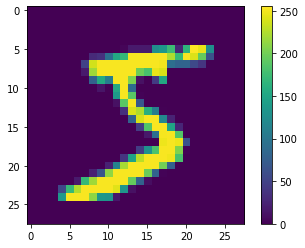

In [ ]:
# как выглядят изображения
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

In [ ]:
# нормализация данных
x_train = x_train / 255
x_test = x_test / 255

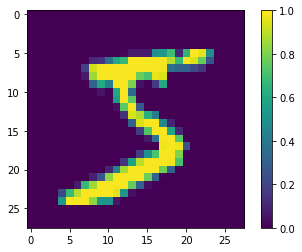

In [ ]:
plt.figure()
plt.imshow(x_train[0])
plt.colorbar()
plt.grid(False)

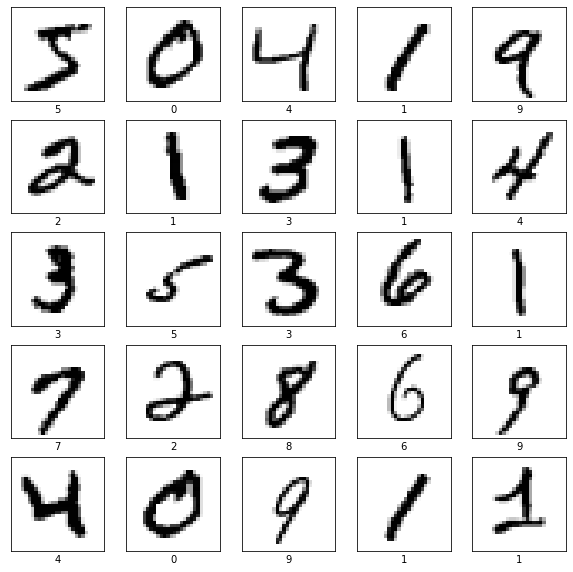

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.imshow(x_train[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[y_train[i]])

In [ ]:
# Создание нейронной сети

# sequential означает, что слои будут идти последовательно
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), # первый входной слой преобразует матрицу 28 на 28 в вектор
    keras.layers.Dense(128, activation="relu"), # первый (входной) полносвязный слой, состоящий из 128 нейронов
    keras.layers.Dense(10, activation="softmax") # второй (выходной) полносвязный слой, состоящий из 10 нейронов (по кол-ву классов). В кач-ве ф-ии активации исп-ся softmax (т.е. сумма вероятностных оценок будет равна 1)
])

In [ ]:
# компиляция модели
# указываем оптимизатор - стохастический градиентный спус (можно исп-ть оптимизатор Adam)
# в кач-ве ф-ии потерь будет использоваться не среднеквадратическое отклонение
# а категориальную перекрестную энтропию, она хорошо работает в задачах классификации, когда классов больше 2
# metrics - параметр кач-ва. accuracy - доля правильных ответов
model.compile(optimizer=keras.optimizers.SGD(), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# отображение параметров модели
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# ф-ия обучения
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1593 - accuracy: 0.9555
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1512 - accuracy: 0.9578
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1435 - accuracy: 0.9599
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1367 - accuracy: 0.9620
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1309 - accuracy: 0.9635
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1252 - accuracy: 0.9654
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1200 - accuracy: 0.9673
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1153 - accuracy: 0.9684
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1110 - accuracy: 0.9698
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.106

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Test accuracy:', test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1167 - accuracy: 0.9671
Test accuracy: 0.9671000242233276


In [ ]:
predictions = model.predict(x_train)

1875/1875 [==============================] - 3s 1ms/step


In [ ]:
predictions[12]

array([6.1456956e-10, 4.5264425e-08, 2.5822405e-07, 9.9999541e-01,
       7.1022854e-10, 2.0444113e-06, 1.7179550e-12, 3.1804626e-09,
       2.1531350e-06, 3.3306385e-08], dtype=float32)

In [ ]:
np.argmax(predictions[12])

3

In [ ]:
y_train[12]

3

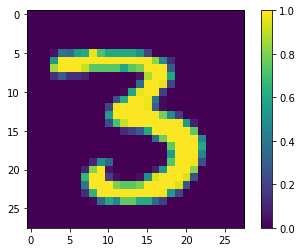

In [ ]:
plt.figure()
plt.imshow(x_train[12])
plt.colorbar()
plt.grid(False)

In [ ]:
class_names[np.argmax(predictions[12])]

'3'

Дальше идет прогон по тестовой выборке

In [ ]:
# получаем предсказания по тестовой выборке
predictions = model.predict(x_test)

313/313 [==============================] - 0s 1ms/step


In [ ]:
predictions[2]

array([3.4170185e-05, 9.8747605e-01, 3.1292534e-03, 7.8232860e-04,
       3.8938245e-04, 5.6920637e-04, 7.0229685e-04, 5.5656666e-03,
       1.2082090e-03, 1.4349258e-04], dtype=float32)

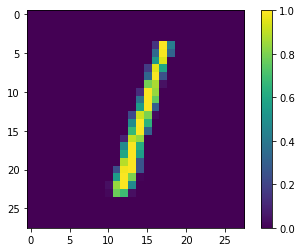

In [ ]:
plt.figure()
plt.imshow(x_test[2])
plt.colorbar()
plt.grid(False)

In [ ]:
class_names[np.argmax(predictions[2])]

'1'